<div style="border:solid Chocolate 2px; padding: 40px">

<b>Hello, Kamil!👋 How are you today?</b>
    
My name is Arina U. and I am glad to be your reviewer in this project! Nice to meet you!<br />


You can find my comments in <font color='green'>green</font>, <font color='gold'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this <a class="tocSkip"> </div>
    
OK, now let's go!😏
</font>

# Robot-run cafe

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1. Download the data and prepare it for analysis](#OpenData&GeneralInfo)
3. [Step 2. Data analysis](#DataAnalysis)
4. [Step 3. Preparing a presentation](#Presentation)
5. [Conclusion](#Conclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | Your first task is to help optimize marketing expense.                                | 
|  **What we have**        | You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?        |
|  **Main question of project**  |  How much money to invest and where to marketers?                               |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/trainer/data-analyst/lesson/da301f15-cfdb-4ac1-ba36-0872df8f9cf5/task/eb50e373-a61a-4206-89a3-49095515f6a7/)    |
| **Datasets**             | [/datasets/visits_log_us.csv](https://code.s3.yandex.net/datasets/visits_log_us.csv)  |
|                          | [/datasets/orders_log_us.csv](https://code.s3.yandex.net/datasets/orders_log_us.csv)  |
|                          | [/datasets/costs_us.csv](https://code.s3.yandex.net/datasets/costs_us.csv)            |

### Step 1. Download the data and prepare it for analysis. <a name="OpenData&GeneralInfo"></a>

In [1]:
# import all packages
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import re as re
!pip install usaddress
import usaddress

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 63 kB 712 kB/s eta 0:00:011
     |████████████████████████████████| 743 kB 1.6 MB/s eta 0:00:01


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Kamil, firstly we install (using pip), secondly we import. So, because you installed the usaddress below, after import, the code in the import block here provides error. I move pip install to this import block. Please, next time be more carefull with that👀👌

In [2]:
print('Pandas version library:',pd.__version__)
print('Numpy version library:', np.__version__)
print('Seaborn version library:', sns.__version__)
#print('Python version:', python.__version__)

Pandas version library: 0.25.1
Numpy version library: 1.19.5
Seaborn version library: 0.9.0


In [3]:
df_data = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data_us.csv', nrows=9651)


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>
       
I would like to recommend you to use `try-except` construction for importing of the data. More details see on the links below:
       
https://www.w3schools.com/python/python_try_except.asp
       
https://docs.python.org/3/tutorial/errors.html

In [4]:
df_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [6]:
def get_percent_of_na_table(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

In [7]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include=['category', 'object', 'float64']))
    print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [8]:
get_info(df_data)

Head:


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.0
object_name,0,0.0
address,0,0.0
chain,3,0.0
object_type,0,0.0
number,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(9651, 6)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Kamil, you created a rather effective and really useful functions, a big plus for them! And yes, you checked the main moments at this step, good job!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
    
You can look at the missing valeus percentage using this code too:
    
`data.isna().sum()*100/len(data)`
       
`data.isna().mean() * 100`
       
`pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')`

Or like this:
    
`report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)`

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Also there is one rather useful library for working with the data - `side table`, it offeres a great number of effective methods for working with the data, including missing values. More info here:
       
https://pbpython.com/sidetable.html
       
https://github.com/chris1610/sidetable

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
As for dublicated values: we can have the situation of the full dublicated values and partly dublicated values in our data. So, it is better to check the dataset for occurence of such partly dublicated values. For example, we can have the same name restaurants that are all located at different addresses. So, you need to check number of restaurants with different integer ids, but same name and same address. 

> * According to general information, the dataset does not have duplicate data.
> * But has 3 missing values in the "chain" column.

In [9]:
df_data[df_data['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [10]:
df_data['chain'].describe()

count      9648
unique        2
top       False
freq       5972
Name: chain, dtype: object

> * According to initial data, more than half of the establishments have no chains.
> * Therefore, for the missing values, we will use that there are no chains for these establishments.

In [11]:
df_data['chain'].mode()

0    False
dtype: object

In [12]:
# Since the variable 'chain' contains boolean values, and it is missing only 3 out of 9648 values, I will replace the missing values with zeros.
df_data['chain'] = df_data['chain'].fillna(df_data['chain'].mode()[0])

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, this strategy can be appropriate here!

In [13]:
get_info(df_data)


Head:


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9651 non-null bool
object_type    9651 non-null object
number         9651 non-null int64
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


,object_name,address,object_type
count,9651,9651,9651
unique,8672,8517,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,Restaurant
freq,47,11,7255


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.0
object_name,0,0.0
address,0,0.0
chain,0,0.0
object_type,0,0.0
number,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(9651, 6)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


> * According to general information, the dataset does not have duplicate data.
> * But has 3 missing values in the "chain" column.
> * According to initial data, more than half of the establishments have no chains.
> * Therefore, for the missing values, we will use that there are no chains for these establishments.

####  Step 2. Data Analysis <a name="DataAnalysis"></a>

- [x] Investigate the proportions of the various types of establishments. Plot a graph.

In [14]:
df_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


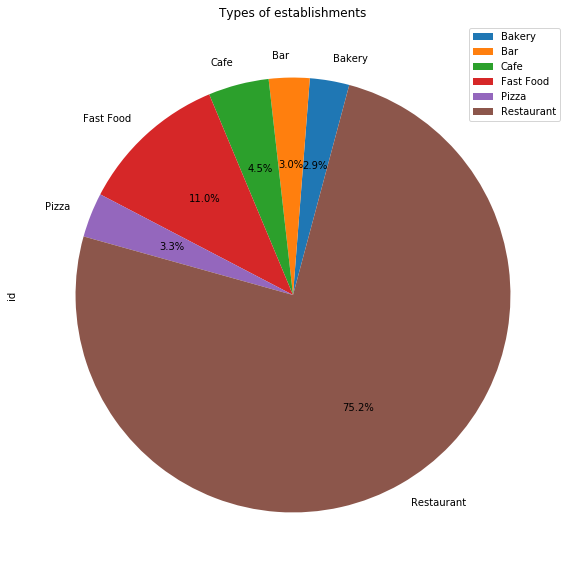

In [15]:
df_data.groupby(['object_type']).count().plot(
    kind='pie', 
    y='id',
    startangle=75,
    figsize=(15,10), 
    autopct='%1.1f%%')

plt.title('Types of establishments')
plt.show() 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, it is absolutely correct to calculate the proportion here, good job!

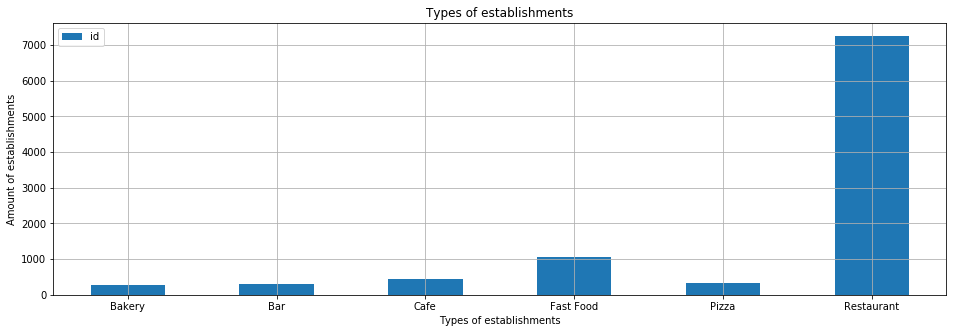

In [16]:
df_data.groupby(['object_type']).count().plot(
    kind='bar', 
    y='id',
    figsize=(16,5),
    grid = True
)

plt.locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.title('Types of establishments')
plt.ylabel('Amount of establishments')
plt.xlabel('Types of establishments')
plt.legend()
plt.show() 

> * According to the plotted graphs, it can be seen that the largest part is occupied by restaurants (75.2%) among the types of establishments.
> * In second place are establishments such as Fast Food (11.0%).
> * And the third most popular is the cafe (4.5%)
> * Based on these statistics, we can say that restaurant-type establishments are the most popular. Is this related to the profitability of these establishments? It's hard to say based on these data.
> * Yes, I have a hypothesis that restaurants have a more attractive ability for tourists visiting LA. But whether this is based on any facts, I have no confirmation based on the current dataset.

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
But it it important not to simply state results from the plot, but also try to explain why we have such results. So, can you please try to explain why restaurants are so popular compared to other types of establishments?

#### <font color='Purple'>Student's commentary:</font>The current dataset does not provide a complete conclusion as to why restaurants are so popular. Too little information. The dataset does not contain the profits that restaurants are potentially earning. Or at least the average check. All this is not. The main reason for opening catering establishments is to make a profit. There is no information on which to draw conclusions. There are just statistics.<a class="tocSkip"> </div>

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
        
Ok, as a whole you are right, yes, here we have only dataset and some context. But, to build the hypotheses and explanations you you can use your experience and your knowledge about this area, even if this knowledge is not professional and at this step - is not verified by the concrete facts like restaurants earnings, but based solely on your everyday, personal experience. In the real work, you will not always (almost never) have complete information about the subject of analysis, and here it is important to be able to generate hypotheses and appeal to personal professional and everyday experience.

* [X] Investigate the proportions of chain and nonchain establishments. Plot a graph.

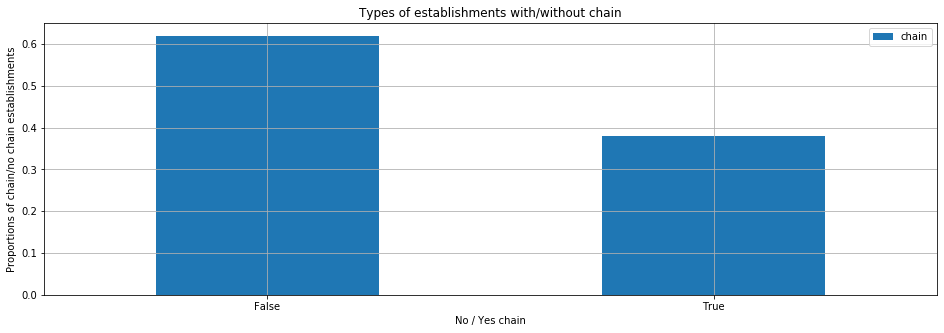

In [17]:
df_data['chain'].value_counts(normalize=True).plot(
    kind='bar',
    figsize=(16,5), 
    grid=True
)
plt.locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.title('Types of establishments with/without chain')
plt.ylabel('Proportions of chain/no chain establishments')
plt.xlabel('No / Yes chain')
plt.legend()
plt.show() 

> * According to the graph, just over 0.6 establishments have no chains and just under 0.4 have chains.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, the plot is absolutely correct!

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
But we try to tell the story, right? So, please, try to explain why the majority of establishments in LA are non-chain types of establishments👀 You can simply build the hypotheses that are based on your experience or assumptions.

> * The only hypothesis that I can state is that most establishments do not have chains, as LA attracts a large number of tourists. For the tourism industry, individuality and uniqueness are important. Restaurants with chains often don't have that personality.
> * Most often, restaurants with a chain are opened as part of a franchise. Thus, they must repeat each other and must be made according to the same pattern and identity.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, I can agree with your assumptions!

- [X] Which type of establishment is typically a chain?

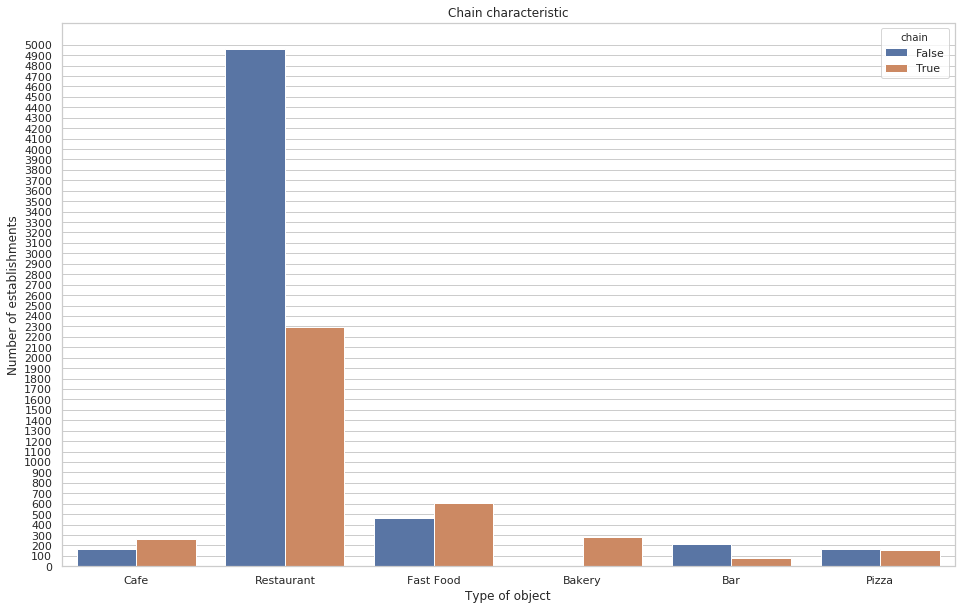

In [18]:
sns.set(style='dark')
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
ax = sns.countplot(x='object_type', hue='chain', data=df_data)
plt.locs, labels = plt.yticks()
plt.yticks(np.arange(0, 5100, step=100))
plt.title('Chain characteristic')
plt.ylabel('Number of establishments')
plt.xlabel('Type of object')
plt.show()

In [19]:
bakery_chain_number     = df_data.groupby('object_type')['chain'].value_counts()
bakery_chain_proportion = df_data.groupby('object_type')['chain'].value_counts(normalize=True)
display(bakery_chain_number)
display(bakery_chain_proportion)

object_type  chain
Bakery       True      283
Bar          False     215
             True       77
Cafe         True      266
             False     169
Fast Food    True      605
             False     461
Pizza        False     167
             True      153
Restaurant   False    4963
             True     2292
Name: chain, dtype: int64

object_type  chain
Bakery       True     1.000000
Bar          False    0.736301
             True     0.263699
Cafe         True     0.611494
             False    0.388506
Fast Food    True     0.567542
             False    0.432458
Pizza        False    0.521875
             True     0.478125
Restaurant   False    0.684080
             True     0.315920
Name: chain, dtype: float64

In [20]:
df_data['object_type'].value_counts()


Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

> * According to the data, Restaurants-type establishments without a chain is the largest number of establishments - 4963. 
Also, restaurants with a chain have the maximum number among other establishments - 2292. It can be concluded that the difference is 2 times.
> * Next come Fast Food establishments: with chain - 605, without chain - 461. Here the gap is not so great.
> * Next is a Cafe. with chain - 266, without chain - 169. 
> * Establishments such as a Bakery deserve special attention. All establishments have a chain in it.
> * Interesting, I think, is the case of establishments, such as a Pizza - the number of establishments with and without a chain is almost equal. 
> * The smallest number of establishments where there is a chain is of the Bar type. 
* Based on these data, I can draw the following general conclusions:
* Restaurants and bars - most often they do not have a chain. This confirms the hypothesis that establishments of these types, which have an individual flavor and unique style, are in the greatest demand: interior, unusual serving of dishes, exclusive cuisine, and so on.
* Fast foods and cafes most often have a network. This is due to the fact that people in such establishments are most interested in food, and not in the environment, in the form of an interior, unusual serving of dishes, exclusive cuisine, and so on.

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
At this step it is better to calculate the share of chain establishments out of the total establishments by type, you will find the interesting insight about one of the object type (be more attentive to bakery)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, bakery is 100% chain.

- [X] What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

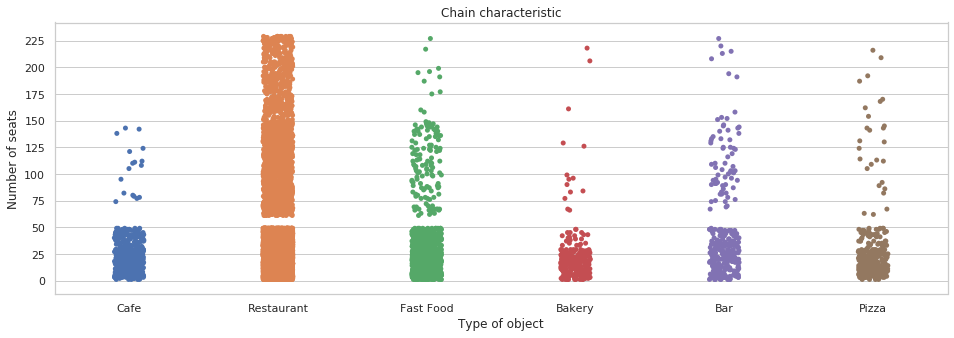

In [21]:
sns.set(style='dark')
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
ax = sns.stripplot(x="object_type", y="number", data=df_data)
plt.locs, labels = plt.yticks()
plt.yticks(np.arange(0, 250, step=25))
plt.setp(labels, rotation=0)
plt.title('Chain characteristic')
plt.ylabel('Number of seats')
plt.xlabel('Type of object')
plt.show()

> * Establishments with a chain generally have 1 to 50 seats.
> * The restaurants have a stable number of seats also in the range from 60 to 150.
> * Bakery establishments have a small number of seats - up to 25.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, I can agree with your conclusions here, good job!

- [X] Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [22]:
averageNumberOfseats = df_data.groupby(['object_type'])['number'].mean().round().reset_index().sort_values(by='number',ascending=False)
averageNumberOfseats.head(10)

,object_type,number
5,Restaurant,48.0
1,Bar,45.0
3,Fast Food,32.0
4,Pizza,28.0
2,Cafe,25.0
0,Bakery,22.0


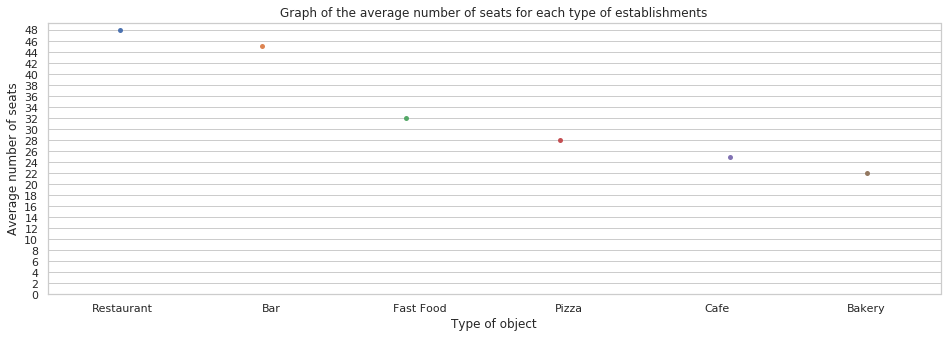

In [23]:
sns.set(style='dark')
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
ax = sns.stripplot(x='object_type', y='number', data=averageNumberOfseats)
plt.locs, labels = plt.yticks()
plt.yticks(np.arange(0, 50, step=2))
plt.setp(labels, rotation=0)
plt.title('Graph of the average number of seats for each type of establishments')
plt.ylabel('Average number of seats')
plt.xlabel('Type of object')
plt.show()

> * On average, Restaurants type of establishments has the greatest number of seats - 48. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Nothing to add, the logic of your decision is absolutely correct here!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Here you can also use barplot.

- [X] Put the data on street names from the address column in a separate column.

In [24]:
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

df_data['street_name']=df_data['address'].apply(lambda x : search_words(x)).str.lower()

In [25]:
df_data.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,n eagle rock blvd
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,world way
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,hollywood blvd
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,w sunset blvd
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,echo park ave


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, you correctly get the streets from address table, keep it up!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
But, ok, if you used regular expression why did you install and import usaddress?👀

- [X] Plot a graph of the top ten streets by number of restaurants.

In [26]:
pivot_streets = df_data.pivot_table(index='street_name', values='id', aggfunc='count').sort_values(by='id',ascending=False).reset_index()
pivot_streets_top_10 = df_data.pivot_table(index='street_name', values='id', aggfunc='count').sort_values(by='id',ascending=False).reset_index().head(10)

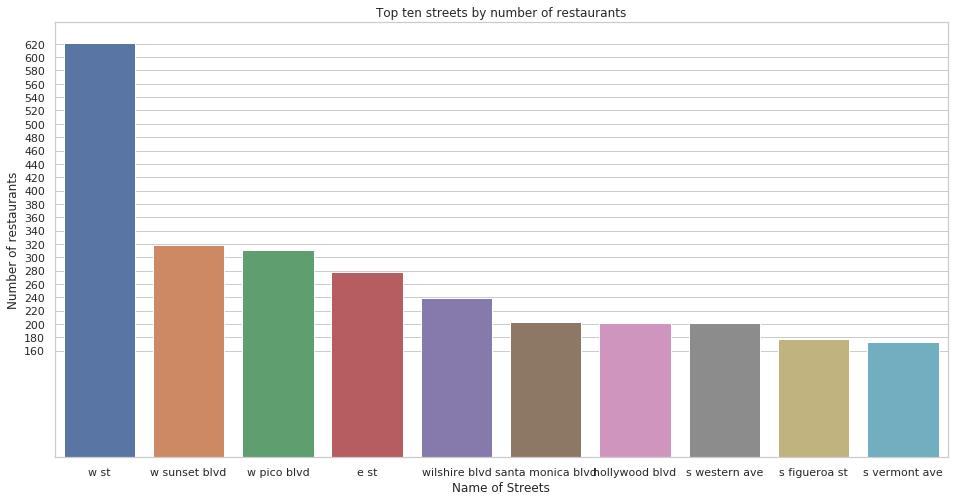

In [27]:
sns.set(style='dark')
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x='street_name', y='id', data=pivot_streets_top_10)
plt.locs, labels = plt.yticks()
plt.yticks(np.arange(160, 640, step=20))
plt.setp(labels, rotation=0)
plt.title('Top ten streets by number of restaurants')
plt.ylabel('Number of restaurants')
plt.xlabel('Name of Streets')
plt.show()

> * "W St" street has a maximum number of establishments - 620.
> * "S Vermont ave" street has a minimum of 170 establishments.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Plot looks very informative👌

- [X] Find the number of streets that only have one restaurant.

In [28]:
streets_est = df_data.groupby('street_name').agg({'id':'count'}).reset_index()
streets_est.columns = ['street_name', 'amount_of_restaurants']
streets_est.head()

,street_name,amount_of_restaurants
0,abbot kinney,1
1,abbot kinney blvd,3
2,academy dr,1
3,airport blvd,10
4,alameda st,1


In [29]:
streetsWithOneEst = streets_est.query('amount_of_restaurants == 1').count()

In [30]:
print('The number of streets that only have one restaurant: {}'.format(len(streetsWithOneEst)))

The number of streets that only have one restaurant: 2


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Kamil, be more attentive to the task formulation: you can have the situation when on one street you have several establishments, so here it seems to me that you calculated not the number of streets but number of establishments. Try to use this code (change it according to your data)
        
1) find streets that only have one establishment
`streets_with_one_est = est_by_streets.query('id == 1').reset_index(drop=True)`
        
before this action you need to group by your data by street_name and apply count for id

2) print results formatting with `len`
`print('The number of streets that only have one establishment is: {}'.format(len(streets_with_one_est)))`
        

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍</b> 


- [X] For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [31]:
np.percentile(pivot_streets['id'], [90, 95])

array([12., 31.])

> * No more than 10% is no more than 12 establishments on the street, no more than 5% is no more than 31 establishments on the street.
> * Thus, let's consider only those streets that have more than 30 establishments. 

In [32]:
list_of_streets_30 = list(pivot_streets[pivot_streets['id'] > 30]['street_name'])
list_of_streets_10 = list(pivot_streets[pivot_streets['id'] > 10]['street_name'])
display(list_of_streets_30)

['w st',
 'w sunset blvd',
 'w pico blvd',
 'e st',
 'wilshire blvd',
 'santa monica blvd',
 'hollywood blvd',
 's western ave',
 's figueroa st',
 's vermont ave',
 'w olympic blvd',
 'beverly blvd',
 'melrose ave',
 'world way',
 'wilshire blvd ste',
 's central ave',
 'venice blvd',
 'n figueroa st',
 'westwood blvd',
 'w st ste',
 's broadway',
 'n western ave',
 'e cesar e chavez ave',
 'whittier blvd',
 'colorado blvd',
 's la brea ave',
 's san pedro st',
 'e whittier blvd',
 'n vermont ave',
 'w slauson ave',
 's main st',
 'w washington blvd',
 'w manchester ave',
 'e olympic blvd',
 'n broadway',
 'w olympic blvd ste',
 's grand ave',
 'sawtelle blvd',
 'york blvd',
 's spring st',
 's western ave ste',
 'san vicente blvd',
 'glendale blvd',
 'n cahuenga blvd',
 's sepulveda blvd',
 'w adams blvd',
 's hill st',
 's alameda st',
 'e florence ave',
 'santa monica blvd ste',
 'n larchmont blvd',
 'w century blvd',
 'crenshaw blvd',
 's figueroa st ste',
 'w jefferson blvd',
 'n

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Ok, 30 can be considered as threshold here. I would like to recommend you to look at 10 restaurant as threshold and compare the results.

In [33]:
# Get the list of streets that have more restaurants than the number you set as a threshold:
restaurants_30 = df_data[df_data['street_name'].isin(list_of_streets_30)]
restaurants_10 = df_data[df_data['street_name'].isin(list_of_streets_10)]
restaurants_30.head()

,id,object_name,address,chain,object_type,number,street_name
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,world way
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,hollywood blvd
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,w sunset blvd
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,national blvd
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,world way


In [34]:
restaurants_30['number'].describe()

count    6134.000000
mean       44.218944
std        47.362813
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

In [35]:
restaurants_10['number'].describe()

count    7421.000000
mean       44.075866
std        47.305653
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

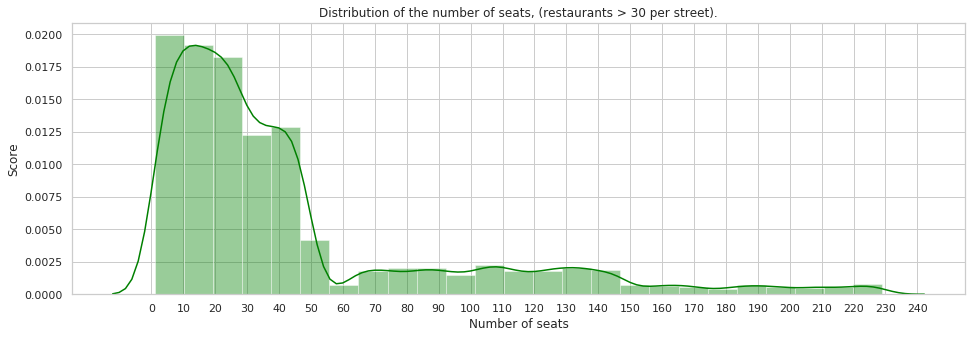

In [36]:
sns.set(style='dark')
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
ax = sns.distplot(restaurants_30['number'], color='green', bins=25)
plt.locs, labels = plt.xticks()
plt.xticks(np.arange(0, 250, step=10))
plt.setp(labels, rotation=0)
plt.title('Distribution of the number of seats, (restaurants > 30 per street).')
plt.ylabel('Score')
plt.xlabel('Number of seats')
plt.show()

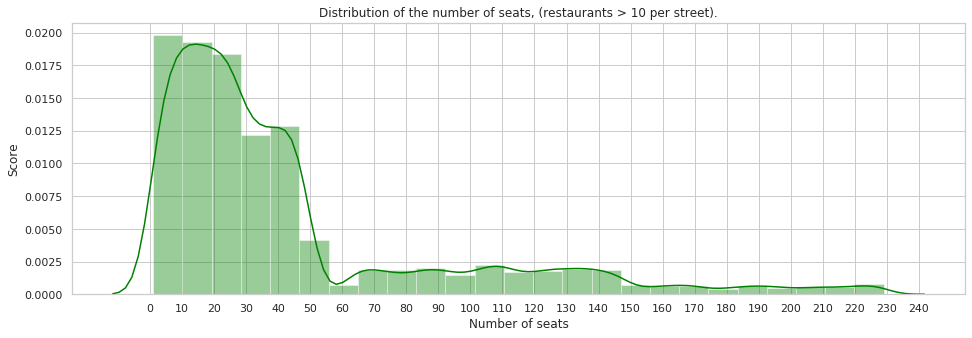

In [37]:
sns.set(style='dark')
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
ax = sns.distplot(restaurants_10['number'], color='green', bins=25)
plt.locs, labels = plt.xticks()
plt.xticks(np.arange(0, 250, step=10))
plt.setp(labels, rotation=0)
plt.title('Distribution of the number of seats, (restaurants > 10 per street).')
plt.ylabel('Score')
plt.xlabel('Number of seats')
plt.show()

> * Looking at the graph, we can say that the most popular are restaurants with a number of seats from 10 to 20.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, it is great that you provided the comparative analysis with 30 and 10 restaurants as threshold. Now we can verify our results and confirm the pattern we observe in case of 30 restaurants as threshold. Good job!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Kamil, it is better to check not only number of seats per each object type in popular streets but also average number of seats per object type in popular streets,
        
see the example of the table for such plot:
       
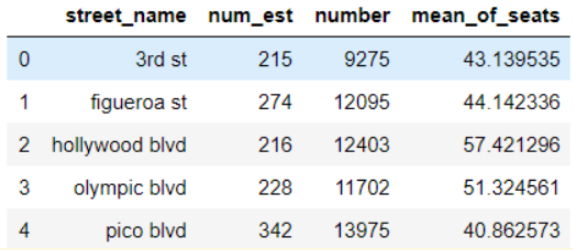
       
Also, if you try to visualize the `distribution of number of restaurants per street` as you mentioned in the task you can also to build such boxplot for each street, something like this:
       
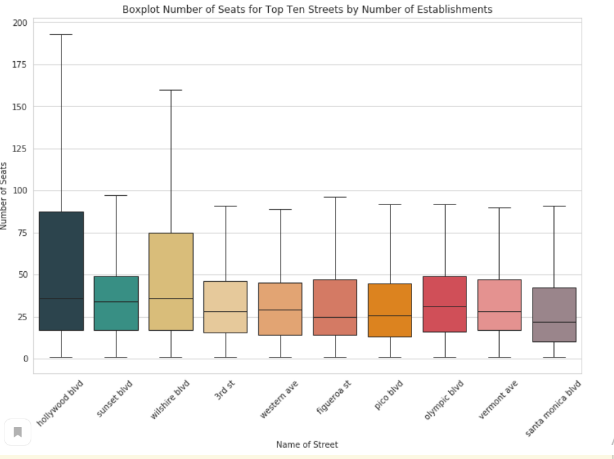

### Step 3. Preparing a presentation <a name="Presentation"></a>

Presentation: https://drive.google.com/file/d/1i6hn38q9hQwImb8Cr4wlH6WNKmXkegQy/view?usp=sharing

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
As for presentation this time: I can see your improvements, agree with new version, looks great!

### Conclusion <a name="Conclusion"></a>

> * The most popular type of establishment is the restaurant type. This type of establishment has the maximum number of chains in its composition, as well as the maximum number of seats. Compared to other types of establishments:
> * According to the plotted graphs, it can be seen that the largest part is occupied by restaurants (75.2%) among the types of establishments.
> * In second place are establishments such as Fast Food (11.0%).
> * And the third most popular is the cafe (4.5%)
> * If you need to open a chain, then you can pay attention to the opening of establishments, such as bakeries. They will definitely be in the format of the chains.
The number of places in the institution. The most optimal, for the first time, at least, can be considered the opening of an institution with a number of seats from 1 to 10, maximum 20.
> * According to the top 10 streets with the largest number of restaurants (30 or more) in the city of Los Angeles and open sources of information, we can conclude that the street in the street is the main street of Los Angeles and therefore the abundance of institutions is not surprising. This raises a question related to costs, the average check and income that an institution can bring, if you open it on one of the streets included in the top 10 by the number of establishments.
> * These conclusions were drawn based on the current dataset. In this set, there is no indication of the profit received, depending on the type of institution. Therefore, it is difficult to say how much the opening of this type of establishment will pay off.
> * Based on the analysis of the existing dataset, I can make a proposal to open a restaurant, without a chain. 

* What is personality? If you open a cafe where robots will serve you, then this can be called an individual. For an institution and place like LA, the format of a restaurant that has no chain is definitely suitable. If you still limit the number of seating places from 10 to 20 and if you can arouse the interest of guests, then people will definitely come to you. The location matters, of course. It will also be necessary to analyze the type of client for whom this institution will be designed. But the main uniqueness of this restaurants will be the uniqueness of customer service - robots.

* Later, when customers get used to the unusual service, then you can open an restaurant with a chain. Cafe format. With the number of seats from 20 to 30.

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b>
        
Kamil, in the final conclusion based on your analysis you need to decide what type of establishment it is better to open: so, please, specify in your final conclusion, what you will choose: chain or non-chain establishment?

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, this time the final conclusion is more precise.

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Kamil, thank you for submitting your project! I can see that you've worked really hard on it! I'm really impressed this the amount of work you have done. But there are several things in your project which I suppose it is important to fix in order to make your project really ideal! My comments will navigate you!


**Good things and practices in your project I want to highlight🙂**:

* You use different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* You worked with the visualization, it is really good that you use plots in your work and formatted them correctly!
* You tried to formulate conclusions after each step of the analysis.
    
**What is worth working on👀**:


* It is worth checking the data for the partial dublicated values
* It is better to try to explain some results you get in more detailed manner
* Other recommendations you will find in my comments.
    
**What about presentation🤩**:

* As a whole the presentation looks great, but I have some recommendations for you:
    
    
   1) it is important to add your name and contact information because you are the author of this presentation, and your investors want to know your name:)
    
   2) you can add pages numbers
    
   3) please, add the final cobclusions and recommendations at slides, it also refers to the intro - please, add some sentences about what your analysis is.


**Good luck! I will wait for your work for a second iteration of the review!😉**
![gif](https://media.giphy.com/media/VTtANKl0beDFQRLDTh/giphy.gif)  

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion: second iteration of the review**

Kamil , thank you for submitting your project with corrections!
    
You did a great job to improve the project, I can see your progress and agree with all your corrections, so I hasten to say that your project has been accepted and you can proceed to the next sprint!
    
**I wish you exciting and cool projects in the next sprints😉**

    
Some additional materials for you, I hope it will be useful🙂
    
<ul>
        <li>Barplot vs pie chart overview: <a>https://chartio.com/learn/charts/how-to-choose-pie-chart-vs-bar-chart/</a></li>
        <li>Pandas profilier: <a>https://github.com/pandas-profiling/pandas-profiling</a></li>
        <li>Top 50 matplotlib visualizations: <a>https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/</a></li>
    </ul>

![gif](https://media.giphy.com/media/l3UcjBJUov1gCRGbS/giphy.gif) 